In [1]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
father_path = '../rawdata/'

In [2]:
#评估方法
def gini(actual, pred, cmpcol = 0, sortcol = 1):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses
 
     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)

def gini_normalized(a, p):
        return gini(a, p) / gini(a, a)
    
def error_eval(pred,dtrain):
    labels = dtrain.get_label()
    error = gini_normalized(labels,pred)
    return 'error',error

In [3]:
xy = pd.read_csv(father_path+'train_extends.csv',header=0,index_col='id')
train_sample,val_sample = train_test_split(xy, test_size = 0.2, random_state= 10)

In [66]:
# train
y_train = train_sample.target
x_train = train_sample.drop(['target','tag'],axis=1)
xgb_train = xgb.DMatrix(x_train,label=y_train)

print(x_train.columns)

# validation set
y_val = val_sample.target
x_val = val_sample.drop(['target','tag'],axis=1)
xgb_val = xgb.DMatrix(x_val,label=y_val)

Index(['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       ...
       'ps_car_14 ps_car_15', 'ps_car_14 ps_calc_01', 'ps_car_14 ps_calc_02',
       'ps_car_14 ps_calc_03', 'ps_car_15 ps_calc_01', 'ps_car_15 ps_calc_02',
       'ps_car_15 ps_calc_03', 'ps_calc_01 ps_calc_02',
       'ps_calc_01 ps_calc_03', 'ps_calc_02 ps_calc_03'],
      dtype='object', length=166)


In [70]:
print(y_train[y_train == 1].shape)
print(y_train[y_train != 1].shape)

(13904,)
(367031,)


In [4]:
from sklearn import metrics

In [72]:
# params value
params={
# general parameters
    'booster':'gbtree',
    'nthread':6,
# booster parameters
    'subsample':0.7, 
    'colsample_bytree':0.7, 
    'min_child_weight':19, 
    'lambda':1,
    'alpha':2,
    'silent':0 ,
    'eta': 0.20, # learning rate .
    'seed':1000,
    'gamma':20,
    'max_depth':6,
# task parameters
    'objective': 'binary:logistic', 
    'eval_metric': 'auc'
}

# train ---- >
plst = list(params.items())
num_rounds = 500 # num of rounds
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
model = xgb.train(plst, xgb_train, num_rounds, watchlist,early_stopping_rounds=100)#,feval =evalerror)


[0]	train-auc:0.552436	val-auc:0.54696
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 100 rounds.
[1]	train-auc:0.565806	val-auc:0.564284
[2]	train-auc:0.581541	val-auc:0.580455
[3]	train-auc:0.587157	val-auc:0.585102
[4]	train-auc:0.588722	val-auc:0.586401
[5]	train-auc:0.601347	val-auc:0.599171
[6]	train-auc:0.604062	val-auc:0.602007
[7]	train-auc:0.60739	val-auc:0.604314
[8]	train-auc:0.607852	val-auc:0.604197
[9]	train-auc:0.611219	val-auc:0.609337
[10]	train-auc:0.612646	val-auc:0.609033
[11]	train-auc:0.612444	val-auc:0.608221
[12]	train-auc:0.612785	val-auc:0.609071
[13]	train-auc:0.616322	val-auc:0.612013
[14]	train-auc:0.617267	val-auc:0.612826
[15]	train-auc:0.618072	val-auc:0.613162
[16]	train-auc:0.619885	val-auc:0.614825
[17]	train-auc:0.620144	val-auc:0.615272
[18]	train-auc:0.62368	val-auc:0.616934
[19]	train-auc:0.624332	val-auc:0.617257
[20]	train-auc:0.625076	val-auc:0.61773
[21]	train-au

[196]	train-auc:0.649527	val-auc:0.632415
[197]	train-auc:0.649527	val-auc:0.632415
[198]	train-auc:0.649527	val-auc:0.632415
[199]	train-auc:0.649527	val-auc:0.632415
[200]	train-auc:0.649527	val-auc:0.632415
[201]	train-auc:0.649527	val-auc:0.632415
[202]	train-auc:0.649527	val-auc:0.632415
[203]	train-auc:0.649527	val-auc:0.632415
[204]	train-auc:0.649527	val-auc:0.632415
[205]	train-auc:0.649527	val-auc:0.632415
[206]	train-auc:0.649527	val-auc:0.632415
[207]	train-auc:0.649527	val-auc:0.632415
[208]	train-auc:0.649527	val-auc:0.632415
[209]	train-auc:0.649527	val-auc:0.632415
[210]	train-auc:0.649527	val-auc:0.632415
[211]	train-auc:0.649527	val-auc:0.632415
[212]	train-auc:0.649527	val-auc:0.632415
[213]	train-auc:0.649794	val-auc:0.632415
[214]	train-auc:0.649794	val-auc:0.632415
[215]	train-auc:0.649794	val-auc:0.632415
[216]	train-auc:0.649794	val-auc:0.632415
[217]	train-auc:0.650225	val-auc:0.632465
[218]	train-auc:0.650225	val-auc:0.632465
[219]	train-auc:0.650452	val-auc:0

[392]	train-auc:0.654494	val-auc:0.632711
[393]	train-auc:0.654494	val-auc:0.632711
[394]	train-auc:0.654494	val-auc:0.632711
[395]	train-auc:0.654494	val-auc:0.632711
[396]	train-auc:0.654494	val-auc:0.632711
[397]	train-auc:0.654494	val-auc:0.632711
[398]	train-auc:0.654494	val-auc:0.632711
[399]	train-auc:0.654494	val-auc:0.632711
[400]	train-auc:0.654494	val-auc:0.632711
[401]	train-auc:0.654494	val-auc:0.632711
[402]	train-auc:0.654704	val-auc:0.632754
[403]	train-auc:0.654704	val-auc:0.632754
[404]	train-auc:0.654704	val-auc:0.632754
[405]	train-auc:0.654704	val-auc:0.632754
[406]	train-auc:0.655023	val-auc:0.632689
[407]	train-auc:0.655023	val-auc:0.632689
[408]	train-auc:0.655023	val-auc:0.632689
[409]	train-auc:0.655294	val-auc:0.632833
[410]	train-auc:0.655294	val-auc:0.632833
[411]	train-auc:0.655294	val-auc:0.632833
[412]	train-auc:0.655294	val-auc:0.632833
[413]	train-auc:0.655294	val-auc:0.632833
[414]	train-auc:0.655294	val-auc:0.632833
[415]	train-auc:0.655294	val-auc:0

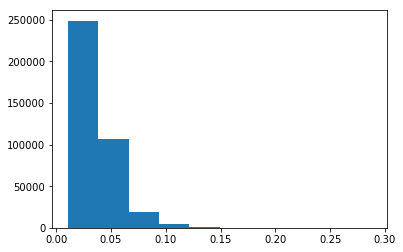

In [76]:
q = model.predict(xgb_train)

plt.hist(q)
plt.show()


In [9]:
model.save_model(father_path+'xgb_iteration_1.model')

In [21]:
def evaluate(preds,actual,types):
    print ("\n Model Report - {} data".format(types))
    print("Accuracy ({}) :{}".format(types,metrics.accuracy_score(preds,actual)))
    print("AUC Score ({}): {}".format(types,metrics.roc_auc_score(preds,actual)))
    print("GINI Score ({}):{}".format(types,gini_normalized(actual,preds)))

In [63]:
y = xy.target
x = xy.drop(['target','tag'],axis =1)
xgb_ax = xgb.DMatrix(x)
bst = xgb.Booster({'nthread':4})
bst.load_model(father_path+'xgb_iteration_1.model')
preds = bst.predict(xgb_ax)

0.28812698

In [48]:
p = preds[:]
# p[p>0.5] = 1
# p[p<=0.5] = 0

In [50]:
evaluate(p,y.values,'Train')


 Model Report - Train data
Accuracy (Train) :0.9635528562338161


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

## rfecv - > how many features are  best for the prediction ?

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

